# Obtaining our dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

This dataset collects information from 100000 medical appointments in brazil and is focused on the question of whether or not patients show up for their appointment. This dataset was originally sourced from </https://www.kaggle.com/>

In [3]:
#Loading our dataset

df = pd.read_csv("C:/Users/Caleb Henry/Desktop/Udacity/noshowappointments-kagglev2-may-2016.csv")

In [4]:
#lets see top 5 samples of our data

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Lets obtain more information about this dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Lets obtain statistical info of our dataset. Transposing, we obtain the following values for each features.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


# Data Wrangling

From the result obtained using .info(), we can see the datatype of each of our features. We noticed some features possess the wrong datatype which has to be changed later. Hence, the need for data wrangling

Data wrangling involves removing erros and combining complex datasets to make them more accessible and easier to analyze. Common Problems to look out for before analysis can be done are as follows; Check for

incorrect datatypes
missing data
duplicates
structural problems like different column names
mismatch number of records;

In [7]:
#Checking for missing or null values

df.isnull().sum().all()

False

In [8]:
#Checking for duplicates

df.duplicated().sum()

0

In [9]:
#Checking the Age features

df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [10]:
#Categorizing Neighbourhood

df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [11]:
#Categorizing Handicap

df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [12]:
#From the above result, we know in reality that no person age can be -1, hence, lets locate the sample with age -1

df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
#replace the -1 age with 0, since its impossible for age to be -1

df.Age.replace({-1:0},inplace=True)

In [14]:
#AppointmentID wont make an significance in our prediction and so, we should remove this

df.drop(['AppointmentID'],axis=1,inplace=True)

In [15]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
#Checking for duplicates again. Though the dataset shows duplicates after the appointmentid was removed but this cant be removed cos these data seems to be very important

df.duplicated().sum()

618

In [17]:
#Renaming the columns

df.rename(columns={'Hipertension':'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'},inplace=True)

#### Solving datatype issues for each features

In [18]:
#Converting scholarship, hypertension, diabetes, alcoholism and sms_received to booleans

for b in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']:
    df[b] = df[b].astype('bool')

In [19]:
#Converting ScheduledDay and AppointmentDay to datetime dtype

for b in ['ScheduledDay', 'AppointmentDay']:
    df[b] = pd.to_datetime(df[b])

In [20]:
#Converting Gender, Neighbourhood, handicap

for b in ['Gender', 'Neighbourhood', 'Handicap']:
    df[b] = df[b].astype('category')

From the no_show column, we know when the response is NO, it means the patient made it for the appointment but when it's YES, it means the patient didnt make it.

In [21]:
#Replacing NO and YES with 0 and 1 inorder to easily convert the datatype

df.No_show.replace({'No': 1, 'Yes': 0},inplace=True)

In [22]:
df.No_show = df.No_show.astype('bool')

In [23]:
df.dtypes

PatientId                     float64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                      bool
Hypertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handicap                     category
SMS_received                     bool
No_show                          bool
dtype: object

In [24]:
#Checking our No_show feature

df.No_show.value_counts()

True     88208
False    22319
Name: No_show, dtype: int64

Questions to solve;

1. What's the age of men that showed up the most for their appointment?
2. What's the proportion of male to female who showed up for their appointment?
3. What's the relationship between (age and gender), (gender and No_show), (age, gender and No_show)?
4. What's the number of males with hypertension that showed up for their appointment?

# Exploratory Data Analysis (EDA)

No_show

In [25]:
#The number of people that did show up for an appointment. No_show is True i.e 1, if the patient showed up and False i.e 0, if the patient didnt show up

df[df['No_show'] == 1].No_show.count()

88208

In [26]:
#The number of people that didnt show up for an appointment

df[df['No_show'] == 0].No_show.count()

22319

AppointmentDay

In [27]:
#The day with the lowest attendance

df.AppointmentDay.min()

Timestamp('2016-04-29 00:00:00+0000', tz='UTC')

In [28]:
#The number of patients on the above day

df.AppointmentDay.value_counts().min()

39

In [29]:
#The day with the highest attendance

df.AppointmentDay.max()

Timestamp('2016-06-08 00:00:00+0000', tz='UTC')

In [30]:
#The number of patients on the above day

df.AppointmentDay.value_counts().max()

4692

Gender

In [31]:
#Total values of male and female patients

total_gender = df.groupby('Gender').count().Age
total_gender

Gender
F    71840
M    38687
Name: Age, dtype: int64

Neighbourhood

In [32]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

Text(0, 0.5, 'Number of patients')

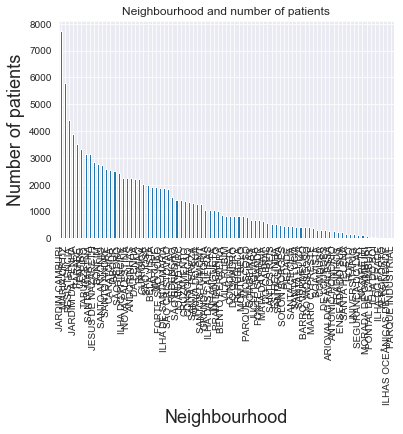

In [33]:
df.Neighbourhood.value_counts().plot(kind='bar',title='Neighbourhood and number of patients',alpha=1)
plt.xlabel('Neighbourhood', fontsize=18)
plt.ylabel('Number of patients', fontsize=18)

Hypertension

In [34]:
df.Hypertension.value_counts()

False    88726
True     21801
Name: Hypertension, dtype: int64

Relationships between two variables;

In [35]:
#Age and patients that showed up

df.groupby('Age').No_show.value_counts()

Age  No_show
0    True       2901
     False       639
1    True       1858
     False       415
2    True       1366
                ... 
99   True          1
100  True          4
102  True          2
115  False         3
     True          2
Name: No_show, Length: 203, dtype: int64

In [36]:
#Females and their age range

df.query('Gender == "F"').Age.value_counts()

0      1722
30     1164
56     1151
52     1149
53     1147
       ... 
115       5
98        5
102       2
100       2
99        1
Name: Age, Length: 103, dtype: int64

In [37]:
df.query('Gender == "F"').Age.max()

115

In [38]:
#males and their age range

df.query('Gender == "M"').Age.value_counts()

0      1818
1      1185
2       861
5       832
9       786
       ... 
95        6
96        4
97        2
100       2
98        1
Name: Age, Length: 100, dtype: int64

In [39]:
df.query('Gender == "M"').Age.max()

100

In [40]:
#Find the number of males and females that showed up for their appointment i.e Gender and No_show

No_show_by_gender = df.groupby(['Gender', 'No_show'])['Gender'].count()
No_show_by_gender

Gender  No_show
F       False      14594
        True       57246
M       False       7725
        True       30962
Name: Gender, dtype: int64

In [41]:
No_show_by_gender.describe(include='all')

count        4.000000
mean     27631.750000
std      22017.841165
min       7725.000000
25%      12876.750000
50%      22778.000000
75%      37533.000000
max      57246.000000
Name: Gender, dtype: float64

In [42]:
#Calculate frequencies of No_show for females

No_show_femaleProp = No_show_by_gender['F']/total_gender['F']
No_show_femaleProp

No_show
False    0.203146
True     0.796854
Name: Gender, dtype: float64

In [43]:
#Calculate frequencies of No_show for males

No_show_maleProp = No_show_by_gender['M']/total_gender['M']
No_show_maleProp

No_show
False    0.199679
True     0.800321
Name: Gender, dtype: float64

In [44]:
#Gender and Neighbourhood

df.groupby('Gender').Neighbourhood.value_counts()

Gender  Neighbourhood    
F       JARDIM CAMBURI       5144
        MARIA ORTIZ          3735
        RESISTÊNCIA          2913
        JARDIM DA PENHA      2665
        ITARARÉ              2266
                             ... 
M       MORADA DE CAMBURI      30
        PONTAL DE CAMBURI      23
        ILHA DO BOI            16
        ILHA DO FRADE          10
        AEROPORTO               3
Name: Neighbourhood, Length: 159, dtype: int64

In [45]:
#Neighbourhood with their patients that were awarded a scholarship

df.query('Scholarship == True').Neighbourhood.value_counts()

ILHA DO PRÍNCIPE     579
TABUAZEIRO           537
RESISTÊNCIA          468
CARATOÍRA            456
SANTA MARTHA         441
                    ... 
PRAIA DO CANTO         0
PARQUE INDUSTRIAL      0
BARRO VERMELHO         0
MORADA DE CAMBURI      0
AEROPORTO              0
Name: Neighbourhood, Length: 81, dtype: int64

In [46]:
#Neighbourhoods with their patients that showed up

df.query('No_show == True').Neighbourhood.value_counts()

JARDIM CAMBURI                 6252
MARIA ORTIZ                    4586
RESISTÊNCIA                    3525
JARDIM DA PENHA                3246
SANTA MARTHA                   2635
                               ... 
ILHA DO BOI                      32
ILHA DO FRADE                     8
AEROPORTO                         7
PARQUE INDUSTRIAL                 1
ILHAS OCEÂNICAS DE TRINDADE       0
Name: Neighbourhood, Length: 81, dtype: int64

In [47]:
#Statisical rep of the relationship between Neighbourhood and No_show

df.query('No_show == True').Neighbourhood.value_counts().describe(include='all')

count      81.000000
mean     1088.987654
std      1096.260581
min         0.000000
25%       321.000000
50%       709.000000
75%      1562.000000
max      6252.000000
Name: Neighbourhood, dtype: float64

In [48]:
#Correlation between features i.e variables

df.corr('pearson')

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
PatientId,1.000000,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.009749,0.001461
Age,-0.004139,1.000000,-0.092457,0.504586,0.292392,0.095811,0.012643,0.060319
Scholarship,-0.002880,-0.092457,1.000000,-0.019729,-0.024894,0.035022,0.001194,-0.029135
Hypertension,-0.006441,0.504586,-0.019729,1.000000,0.433086,0.087971,-0.006267,0.035701
Diabetes,0.001605,0.292392,-0.024894,0.433086,1.000000,0.018474,-0.014550,0.015180
Alcoholism,0.011011,0.095811,0.035022,0.087971,0.018474,1.000000,-0.026147,0.000196
SMS_received,-0.009749,0.012643,0.001194,-0.006267,-0.014550,-0.026147,1.000000,-0.126431
No_show,0.001461,0.060319,-0.029135,0.035701,0.015180,0.000196,-0.126431,1.000000


Relationship between more than two variables;

In [49]:
#Ages of females that showed up for their appointment

df.query('Gender == "F" and No_show == True').Age.value_counts()

0      1403
56      989
52      951
53      934
51      930
       ... 
98        4
102       2
100       2
115       2
99        1
Name: Age, Length: 103, dtype: int64

In [50]:
#Ages of males that showed up for their appointment

df.query('Gender == "M" and No_show == True').Age.value_counts()

0      1498
1       972
2       720
5       657
3       615
       ... 
96        4
95        4
100       2
98        1
97        1
Name: Age, Length: 100, dtype: int64

In [51]:
#Ages of males that didnt show up for their appointment

df.query('Gender == "M" and No_show == False').Age.value_counts()

0     320
9     228
1     213
8     176
5     175
     ... 
92      3
95      2
94      2
91      1
97      1
Name: Age, Length: 97, dtype: int64

In [52]:
#Ages of females that didnt show up for their appointment

df.query('Gender == "F" and No_show == False').Age.value_counts()

0      319
30     291
19     280
21     270
25     268
      ... 
95       4
115      3
98       1
97       1
96       1
Name: Age, Length: 100, dtype: int64

In [53]:
#The neighbourhood with scholarships that showed up for appointment

df.query('Scholarship == True and No_show == True').Neighbourhood.value_counts()

ILHA DO PRÍNCIPE     438
TABUAZEIRO           433
RESISTÊNCIA          374
CARATOÍRA            352
SANTA MARTHA         344
                    ... 
MORADA DE CAMBURI      0
BARRO VERMELHO         0
PRAIA DO CANTO         0
ILHA DO BOI            0
AEROPORTO              0
Name: Neighbourhood, Length: 81, dtype: int64

In [54]:
#The neighbourhood without scholarship that showed up for appointment

df.query('Scholarship == False and No_show == True').Neighbourhood.value_counts()

JARDIM CAMBURI                 6136
MARIA ORTIZ                    4502
JARDIM DA PENHA                3236
RESISTÊNCIA                    3151
CENTRO                         2520
                               ... 
ILHA DO BOI                      32
ILHA DO FRADE                     8
AEROPORTO                         7
PARQUE INDUSTRIAL                 1
ILHAS OCEÂNICAS DE TRINDADE       0
Name: Neighbourhood, Length: 81, dtype: int64

In [55]:
#The neighbourhood without scholarships that didnt show up for appointment

df.query('Scholarship == False and No_show == False').Neighbourhood.value_counts()

JARDIM CAMBURI                 1422
MARIA ORTIZ                    1184
ITARARÉ                         834
RESISTÊNCIA                     812
CENTRO                          671
                               ... 
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
PARQUE INDUSTRIAL                 0
Name: Neighbourhood, Length: 81, dtype: int64

In [56]:
#The neighbourhood without scholarships that didnt show up for appointment

df.query('Scholarship == True and No_show == False').Neighbourhood.value_counts()

ILHA DO PRÍNCIPE     141
GURIGICA             111
TABUAZEIRO           104
CARATOÍRA            104
SANTA MARTHA          97
                    ... 
REPÚBLICA              0
PRAIA DO CANTO         0
PONTAL DE CAMBURI      0
PARQUE INDUSTRIAL      0
AEROPORTO              0
Name: Neighbourhood, Length: 81, dtype: int64

We can see from above, the relationships that exist between those with or without scholarship that either attended or missed their appointments for each neighbourhood.

In [57]:
#Females with scholarship that are handicapped

df.query('Gender == "F" and Scholarship == True and Handicap == True').count().Gender

116

In [58]:
#Males with scholarship that are handicapped

df.query('Gender == "M" and Scholarship == True and Handicap == True').count().Gender

44

In [59]:
#Males with hypertension that showed up for appointment

df.query('Gender == "M" and Hypertension == True and No_show == True').count().Gender

5347

In [60]:
#Females with hypertension that showed up for appointment

df.query('Gender == "F" and Hypertension == True and No_show == True').count().Gender

12682

In [61]:
#Ages of males that showed up for their appointment

df.query('Gender == "M" and No_show == True').Age.value_counts()

0      1498
1       972
2       720
5       657
3       615
       ... 
96        4
95        4
100       2
98        1
97        1
Name: Age, Length: 100, dtype: int64

In [62]:
#Males and Females with hypertension and diabetes that showed up for their appointments

df.query('Hypertension == True and Diabetes == True and No_show == True').Gender.value_counts()

F    3851
M    1494
Name: Gender, dtype: int64

In [63]:
#Males and Females with hypertension and diabetes that showed up for their appointments after receiving sms notification

df.query('Hypertension == True and Diabetes == True and SMS_received == True and No_show == True').Gender.value_counts()

F    1060
M     439
Name: Gender, dtype: int64

In [64]:
#Females that are handicapped in a particular neighbourhood
df.query('Gender == "F" and Handicap == True').Neighbourhood.value_counts()

SANTO ANTÔNIO        72
TABUAZEIRO           57
CENTRO               55
SÃO JOSÉ             50
SANTA MARTHA         48
                     ..
SANTA HELENA          0
MÁRIO CYPRESTE        0
NAZARETH              0
PARQUE INDUSTRIAL     0
AEROPORTO             0
Name: Neighbourhood, Length: 81, dtype: int64

In [65]:
#Males that are handicapped in a particular neighbourhood
df.query('Gender == "M" and Handicap == True').Neighbourhood.value_counts()

GRANDE VITÓRIA         46
SANTA MARTHA           37
NOVA PALESTINA         36
RESISTÊNCIA            36
JARDIM DA PENHA        32
                       ..
ILHA DE SANTA MARIA     0
PONTAL DE CAMBURI       0
MORADA DE CAMBURI       0
PARQUE INDUSTRIAL       0
AEROPORTO               0
Name: Neighbourhood, Length: 81, dtype: int64

# Data Visualisation

In [66]:
def countp(col_name):
    sns.countplot(col_name)

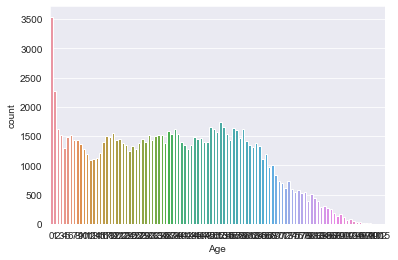

In [67]:
#Plot showing Ages

countp(df.Age);

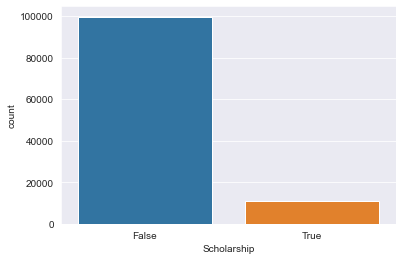

In [68]:
#Plot of Scholarship

countp(df.Scholarship);

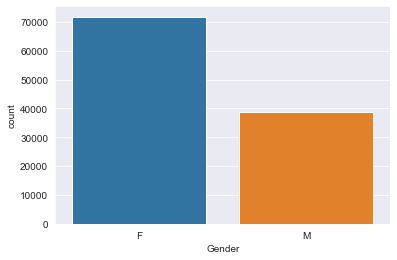

In [69]:
#Plot of Gender distribution

countp(df.Gender);

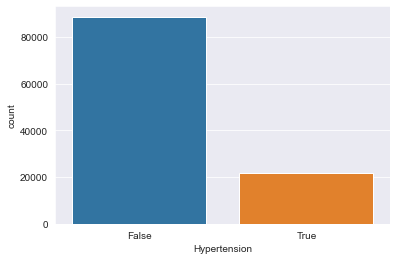

In [70]:
#Plot for hypertension patients

countp(df.Hypertension)

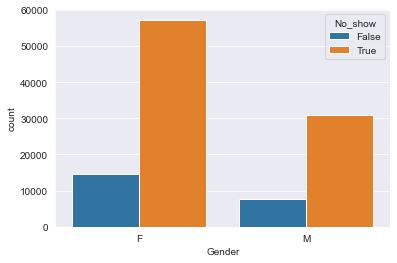

In [71]:
#The relationship between gender and No_show. this shows us the gender with a higher chance of showing up

sns.countplot(df.Gender,hue=df['No_show']);

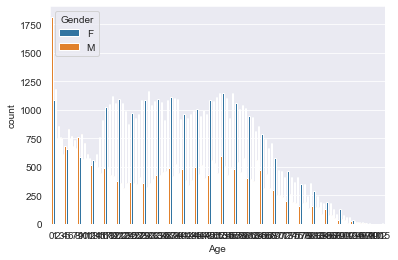

In [72]:
#plot of age against gender

sns.countplot(df.Age,hue=df['Gender']);

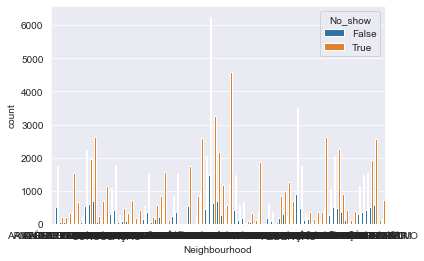

In [73]:
sns.countplot(df.Neighbourhood, hue=df['No_show']);

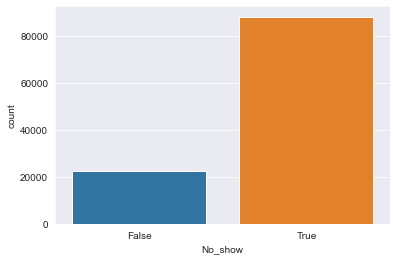

In [74]:
#Appointment distribution

sns.countplot(df['No_show']);

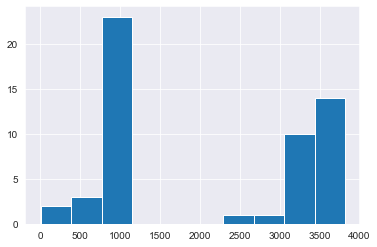

In [75]:
df.groupby(['AppointmentDay', 'No_show'])['Gender'].count().hist();

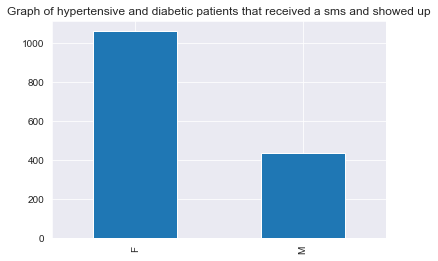

In [76]:
df.query('Hypertension == True and Diabetes == True and SMS_received == True and No_show == True').Gender.value_counts().plot(kind='bar', title='Graph of hypertensive and diabetic patients that received a sms and showed up');

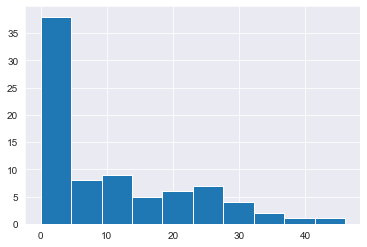

In [77]:
df.query('Gender == "M" and Handicap == True').Neighbourhood.value_counts().hist();

# Conclusion

From the above analysis and visualisation, the following can be observed based on questions asked;

* Men that were 0-yo, showed up the most for their appointments. They were about 1498
* 80% men showed up for their appointments as against 79.6% women that showed up for their appointments. The % difference amongst gender can be said to be negligible since it's just about 0.4%
* The oldest females were 115yo while the oldest men were 100yo. Hence, it can be seen they were more younger men than women as can be seen from the youngest males and females.
* 57246 females out of 71840 showed up for their appointment while about 30962 males out of 38687 showed up for their appointments.
* 1403 females of 0-yo showed up for their appointment while 1498 males of same age showed up for their appointment. It can be seen the lower the age, the higher their chances of making it to their appointment since less than 12 females of age 98 and above were able to show up while less than 13 males of age 95 and above did same.
* 5347 males with hypertension showed up for their appointment

# References

</https://stackoverflow.com/>
</https://janamalesova.github.io/>